<a href="https://colab.research.google.com/github/ucheokechukwu/No-Context-Experiments/blob/main/Duplicate-Detector/2%20Features%20Model/Fine_Tuning_the_Selected_(2_features)_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note**: This notebook continues from the previous notebook on EDA and Feature Engineering. Most of this Notebook was prepared with Google Colab. The URLs to file locations on Google Drive can be replaced by the local file path. i.e. `/content/drive/MyDrive/output/train_complete.csv` should be substituted with `../output/train_complete.csv`

Please note that some files were considered too large for Git and are not available.

In [1]:
from google.colab import drive
drive.mount('drive')
import os
os.chdir("/content/drive/MyDrive/MLOPs_Projects/Quora_Duplicate_Dectector_V2/src")

Mounted at drive


# Modeling - Deep Learning

Deep Learning experiments start here. The strategy is to start with a simple model and one feature, and build up on from there.

## Note on Building the Dataset

The csvs datasets will be converted to the Tensorflow's `.dataset` class, which will optimize the training process and reduce the memory load on the processors.

From the website:

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

The `tf.data.Dataset API` supports writing descriptive and efficient input pipelines. Dataset usage follows a common pattern:

- Create a source dataset from your input data.
- Apply dataset transformations to preprocess the data.
- Iterate over the dataset and process the elements.
Iteration happens in a streaming fashion, **so the full dataset does not need to fit into memory**.




In [2]:
import sys
sys.path.append('trainer')
from model_trainer import *
from model_builder import *
from dataset_builder import *

train_df, test_df, y_test, y_train = get_train_test_df_2_features()
train_dataset, validation_dataset, test_dataset = get_model_6_dataset(train_df, test_df)

## GridSearch Model


In [3]:
from sklearn.model_selection import ParameterGrid
from tqdm.auto import tqdm
    # putting the hyperparameters into a grid
params = {
        'features_hidden_units' : [8],
        'concat_hidden_units' : [128],
        'dropout' : [False],
    }
param_grid = ParameterGrid(params)

models_dictionary = {}

  0%|          | 0/1 [00:00<?, ?it/s]




Parameters : dict_values([128, False, 8])


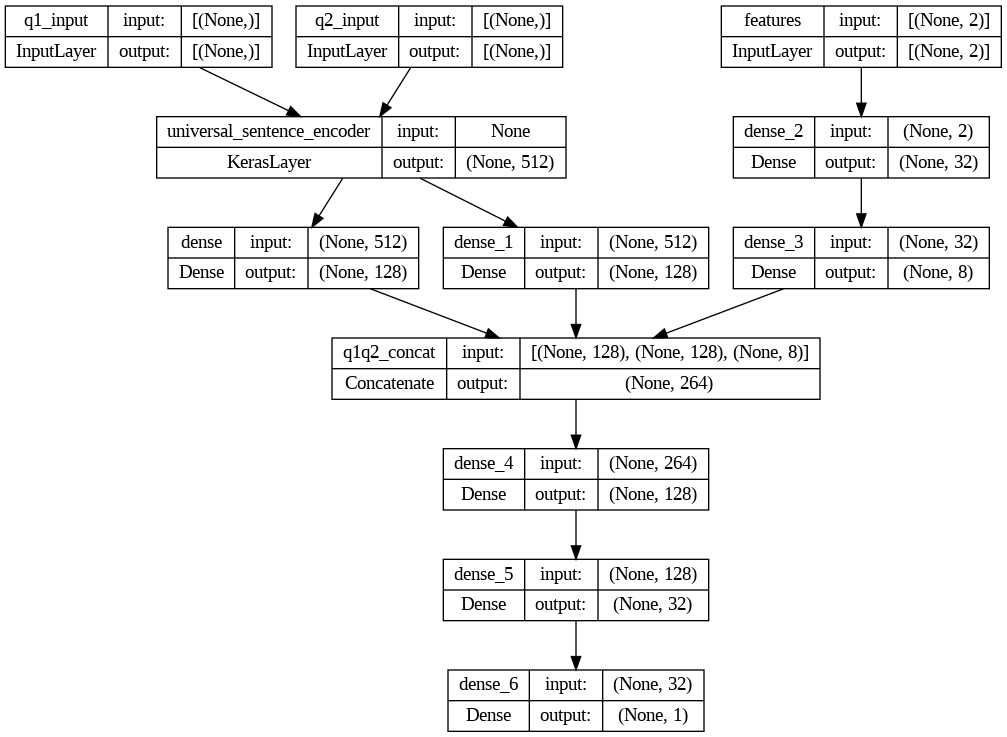

Training Model model_features_hidden_units_8_concat_hidden_units_128_dropout_False
Epoch 1/150
258/258 [==============================] - 42s 120ms/step - loss: 0.5438 - accuracy: 0.7221 - val_loss: 0.4993 - val_accuracy: 0.7522
Epoch 2/150
258/258 [==============================] - 26s 102ms/step - loss: 0.5026 - accuracy: 0.7475 - val_loss: 0.4765 - val_accuracy: 0.7768
Epoch 3/150
258/258 [==============================] - 27s 106ms/step - loss: 0.4864 - accuracy: 0.7569 - val_loss: 0.5033 - val_accuracy: 0.7623
Epoch 4/150
258/258 [==============================] - 29s 111ms/step - loss: 0.4871 - accuracy: 0.7550 - val_loss: 0.4686 - val_accuracy: 0.7701
Epoch 5/150
258/258 [==============================] - 25s 98ms/step - loss: 0.4693 - accuracy: 0.7678 - val_loss: 0.4722 - val_accuracy: 0.7712
Epoch 6/150
258/258 [==============================] - 29s 112ms/step - loss: 0.4749 - accuracy: 0.7690 - val_loss: 0.4676 - val_accuracy: 0.7690
Epoch 7/150
258/258 [=====================

In [ ]:
for dict_ in tqdm(param_grid):
    print('\n\n\nParameters :', dict_.values())

    concat_hidden_units, dropout, features_hidden_units = dict_.values()

    model, name = build_grid_model(features_hidden_units, concat_hidden_units, dropout)
    print(f"Training Model {name}")
    model, history = train_model(model, name,
                                train_dataset,
                                validation_dataset,
                                 patience=15,
                                 num_epochs=150)
    models_dictionary[name] = [model, test_dataset, history]



# Evaluations

In [ ]:
import matplotlib.pyplot as plt

results = []
for k, v in models_dictionary.items():
    model_name = k
    model, test_data = v[0], v[1]
    result, _ = calculate_results(model, test_data, y_test)
    results.append(result)

all_results = pd.DataFrame(results)
all_results.index = models_dictionary.keys()
plt.figure(figsize=(20,20))
all_results = all_results.sort_values('f1', ascending=False)

all_results.plot(kind='barh')
plt.legend(loc='lower right', title='Metrics')
plt.title('Performance Scores')
plt.show()

In [ ]:
all_results

In [ ]:
fig, ax = plt.subplots(2,len(models_dictionary), figsize=(4,len(models_dictionary)*8))
i = 0
for k, v in models_dictionary.items():
    title = k
    history = v[-1]
    plot_history(history, title, ax[i])
    i +=1
    if i==1:
        ax[i].set_visible(False)
plt.show()

In [14]:
!mkdir ../models/tf2_model

In [20]:
for v in models_dictionary.values():
    model = v
    break

In [33]:
# loaded_model = tf.keras.saving.load_model("../models/tf2_model/tf_model")
import numpy as np
assert np.allclose(model.predict(test_dataset), model.predict(test_dataset))


316/316 [==============================] - 14s 45ms/step


AssertionError: ignored

In [34]:
import time
time.time()

1701030951.0225236